<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
- What are the risk factors for breast cancer
- What are the characteristics/history of a person with breast cancer


## Actual Question
- What are the characteristics/history of a person with breast cancer

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [4]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', sep = ',', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#name df cols based on docs
df_cols=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se','concave_points_se', 'symetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst','concave_points_worst', 'symetry_worst', 'fractal_dimension_worst']
df.columns = df_cols

In [8]:
#change diagnosis col values to b:0, m:1
df.replace({'diagnosis' : { 'B' : 0, 'M' : 1}}, inplace=True)

In [9]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symetry_mean               0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symetry_se                 0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symetry_worst              0
fractal_dimension_worst    0
dtype: int64

In [16]:
sns.pairplot(df)
plt.show()

KeyboardInterrupt: 

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [14]:
import numpy as np
from scipy import stats
#remove all outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

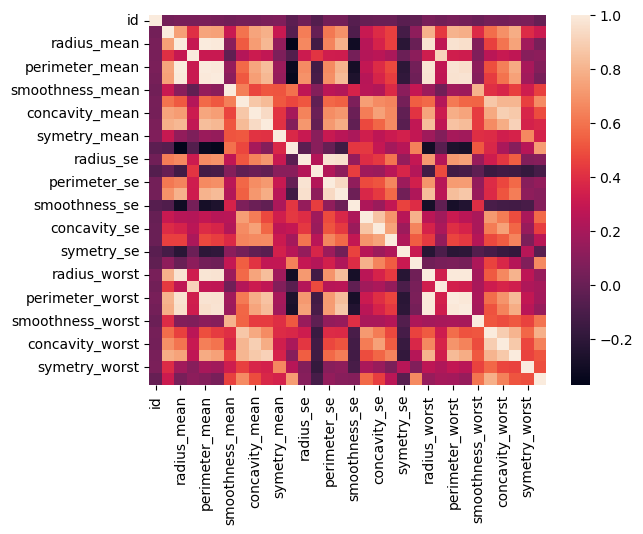

In [25]:
#feature selection based on correlation
sns.heatmap(df.corr())
plt.show()

In [26]:
corr = df.corr()

In [27]:
#remove features with a correlation of more than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = df.columns[columns]

df = df[selected_columns]

In [28]:
df.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symetry_mean,fractal_dimension_mean,radius_se,...,compactness_se,concavity_se,concave_points_se,symetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symetry_worst,fractal_dimension_worst
1,842517,1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,84300903,1,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
4,84358402,1,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678
5,843786,1,12.45,15.70,0.12780,0.17000,0.1578,0.2087,0.07613,0.3345,...,0.03345,0.03672,0.01137,0.02165,0.005082,0.1791,0.5249,0.5355,0.3985,0.12440
6,844359,1,18.25,19.98,0.09463,0.10900,0.1127,0.1794,0.05742,0.4467,...,0.01382,0.02254,0.01039,0.01369,0.002179,0.1442,0.2576,0.3784,0.3063,0.08368


In [48]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [29]:
#normalize
from sklearn.preprocessing import StandardScaler
# id will be dropped as not a predictor, diagnosis is the target so its dropped from X
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
    We will try all input variables
- Is there an output variable (label)?
    diagnosis
- If there is an output variable:
    - What is it? *diagnosis*
    - What is its type? *it is a boolean*
- What type of Modelling is it?
    - [X] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [X] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [32]:
y.value_counts()

0    327
1    160
Name: diagnosis, dtype: int64

In [33]:
160/327

0.4892966360856269

Slight Imbalance. 
- An imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6).

A slight imbalance is often not a concern, and the problem can often be treated like a normal classification predictive modeling problem. A severe imbalance of the classes can be challenging to model and may require the use of specialized techniques.



***Any dataset with an unequal class distribution is technically imbalanced. However, a dataset is said to be imbalanced when there is a significant, or in some cases extreme, disproportion among the number of examples of each class of the problem***

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [37]:
from xgboost import XGBClassifier

In [38]:
model = XGBClassifier()
model.fit(X_train, y_train)

[09:57:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [55]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score

In [44]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [45]:
#evaluate predictions accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.94%


In [47]:
#quick and dirty confusion matrix
pd.crosstab(y_test, y_pred)
#0 false positives, 3 false negatives

col_0,0,1
diagnosis,,
0,59,0
1,3,36


In [52]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [63]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC score: %.2f%%' % (auc*100.0))

AUC score: 96.15%


# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symetry_worst', 'fractal_dimension_worst'
       
- are good predictors of breast cancer



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



